<a href="https://colab.research.google.com/github/krishhsuri/ML-AI-Projects/blob/main/Deep_CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import cv2
import imghdr
import os
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-2-7c10482627ad>:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = 'data'

In [4]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
          img = cv2.imread(image_path)
          tip = imghdr.what(image_path)
          if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/happy/happy (37).jpg
Image not in ext list data/happy/happy (33).jpg
Image not in ext list data/happy/happy (29).jpg
Image not in ext list data/happy/happy (31).jpg
Image not in ext list data/happy/happy (28).jpg
Image not in ext list data/sad/sad (46).jpg
Image not in ext list data/sad/sad (47).jpg
Image not in ext list data/sad/sad (44).jpg


In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 296 files belonging to 2 classes.


In [8]:
data = data.map(lambda x,y : (x/255,y))

In [9]:
scaled_iterator = data.as_numpy_iterator()

In [10]:
batch = scaled_iterator.next()

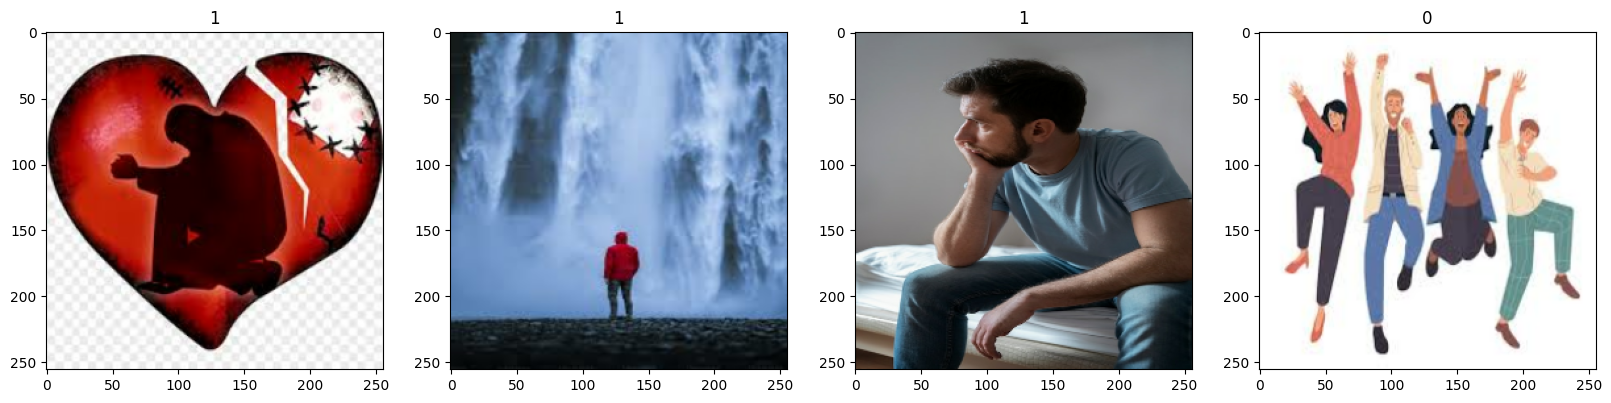

In [11]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data.as_numpy_iterator().next()[0].max()

1.0

In [13]:
len(data)

10

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
logdir = 'logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4912 - loss: 1.1129 - val_accuracy: 0.4375 - val_loss: 0.7961
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4849 - loss: 0.7378 - val_accuracy: 0.7031 - val_loss: 0.6715
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7045 - loss: 0.6736 - val_accuracy: 0.8438 - val_loss: 0.6238
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7326 - loss: 0.6228 - val_accuracy: 0.8438 - val_loss: 0.5025
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7622 - loss: 0.5467 - val_accuracy: 0.7969 - val_loss: 0.4373
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8326 - loss: 0.4357 - val_accuracy: 0.7969 - val_loss: 0.3703
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8069 - loss: 0.3934 - val_accuracy: 0.7969 - val_loss: 0.4070
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8117 - loss: 0.3599 - val_accuracy: 0.9062 - val_loss: 0.2746
Epoch 9/

In [25]:
hist

In [26]:
hist.history

{'accuracy': [0.4821428656578064,
  0.5133928656578064,
  0.7008928656578064,
  0.6919642686843872,
  0.75,
  0.8214285969734192,
  0.7946428656578064,
  0.8169642686843872,
  0.8571428656578064,
  0.8973214030265808,
  0.9330357313156128,
  0.9330357313156128,
  0.96875,
  0.9732142686843872,
  0.96875,
  0.9821428656578064,
  0.9910714030265808,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128],
 'loss': [1.1011083126068115,
  0.7080230712890625,
  0.6727398037910461,
  0.6143093705177307,
  0.548007607460022,
  0.4364977180957794,
  0.40678921341896057,
  0.35017940402030945,
  0.28607526421546936,
  0.2419501543045044,
  0.22710750997066498,
  0.19619719684123993,
  0.12004433572292328,
  0.09639893472194672,
  0.0917091891169548,
  0.05462973564863205,
  0.04394504055380821,
  0.029117384925484657,
  0.03312503919005394,
  0.020321836695075035],
 'val_accuracy': [0.4375,
  0.703125,
  0.84375,
  0.84375,
  0.796875,
  0.796875,
  0.796875,
  0.90625,
  0.890625,
  

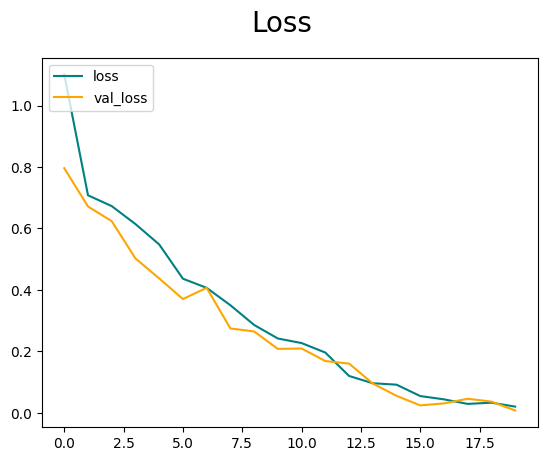

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [35]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


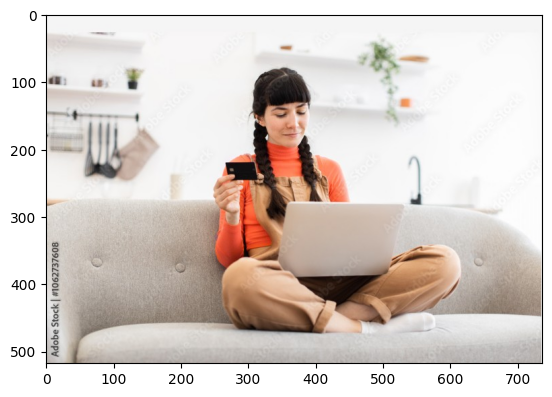

In [49]:
img = cv2.imread('test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

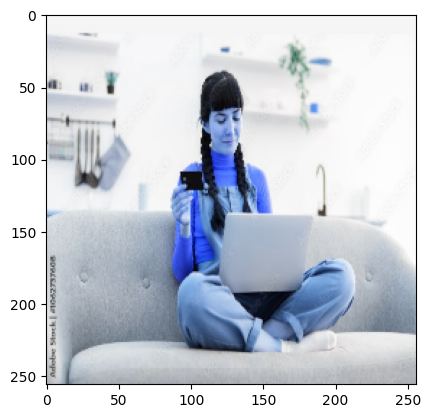

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [52]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [53]:
yhat

array([[0.78963333]], dtype=float32)